In [2]:
import torch
from torch import nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import random
from kmeans import *
import cv2
import os
from tqdm import tqdm

In [2]:
def load_images():
    image_paths = os.listdir('arcane')
    images = np.empty(shape=(len(image_paths), 32, 32, 3), dtype='float32')
    for i, path in enumerate(image_paths):
        img = cv2.imread('arcane/' + path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images[i] = img / 255.0
    return images

In [3]:
images = load_images()

In [4]:
images.dtype

dtype('float32')

In [5]:
def get_random_image():
    idx = random.randint(0, len(images)-1)
    return images[idx]

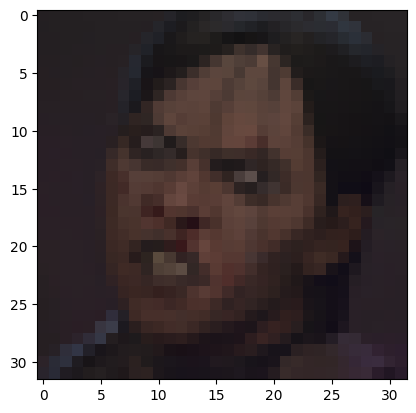

In [6]:
img = get_random_image()
plt.imshow(img)

In [7]:
points = []
for i in range(1000):
    img = get_random_image()
    img = np.reshape(img, (-1, 3))
    points.append(random.choice(img).copy())

In [8]:
points

[array([0.10196079, 0.08627451, 0.09411765], dtype=float32),
 array([0.07843138, 0.10196079, 0.13725491], dtype=float32),
 array([0.25490198, 0.21960784, 0.2       ], dtype=float32),
 array([0.10980392, 0.07843138, 0.08627451], dtype=float32),
 array([0.47058824, 0.32156864, 0.25882354], dtype=float32),
 array([0.72156864, 0.6117647 , 0.5568628 ], dtype=float32),
 array([0.32941177, 0.27450982, 0.26666668], dtype=float32),
 array([0.19607843, 0.18039216, 0.13725491], dtype=float32),
 array([0.32941177, 0.34509805, 0.46666667], dtype=float32),
 array([0.17254902, 0.15294118, 0.20392157], dtype=float32),
 array([0.16470589, 0.1254902 , 0.1254902 ], dtype=float32),
 array([0.40784314, 0.34901962, 0.26666668], dtype=float32),
 array([0.5019608 , 0.29803923, 0.18039216], dtype=float32),
 array([0.19215687, 0.1254902 , 0.10980392], dtype=float32),
 array([0.5176471 , 0.38039216, 0.23137255], dtype=float32),
 array([0.46666667, 0.33333334, 0.25490198], dtype=float32),
 array([0.34509805, 0.25

In [9]:
def find_nearest(p, points):
    d = float('inf')
    idx = 0
    for i in range(len(points)):
        distance = dist(p, points[i])
        if distance < d:
            idx = i
            d = distance
    return idx

In [10]:
def reconstruct(img, palette):
    reconstructed = np.empty_like(img, dtype='float32')
    reconstructed_i = np.empty(shape=(img.shape[0], img.shape[1]), dtype='uint8')
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            nearest = find_nearest(img[i][j], palette)
            reconstructed[i][j] = palette[nearest]
            reconstructed_i[i][j] = nearest
    return reconstructed, reconstructed_i

In [11]:
clusters = kmeans(points, 128, 0.1, 200)

0.016859303133399728
0.015562496726621671
0.01460536561312295
0.01332420084308684
0.012258385458418815
0.01118324144000616
0.010365519623334365
0.009590605808903519
0.009009718963420356
0.008752100434753532
0.008142938453322411
0.00747857300890201
0.007013178812240037
0.00675629908100022
0.0066818958555582755
0.006335173068383936
0.005806039225576505
0.00573163532706398
0.005679631486838316
0.005422221771304007
0.005367242129188764
0.006063675895160564
0.005537119475639434
0.005031354583969282
0.004843619652584038
0.004405459403525478
0.004312633015502952
0.003881369026151679
0.003493232741778451
0.0031993908357299474
0.0030043822851579726
0.002838748740966092
0.0025799988021758544
0.0023219999351974468
0.0023405038547789645
0.0022908082854409427
0.0020859936291116577
0.0020554519762339225
0.0018499071460273383
0.0016649148464841636
0.0016157690688935599
0.0015013156917712041
0.0014423124629329568
0.0013119736260103138
0.0011807768138652208
0.0011032546936053512
0.0010586620179655324
0

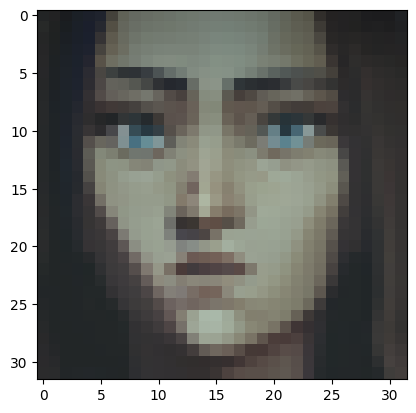

In [12]:
image = get_random_image()
plt.imshow(image)

In [13]:
palette = []
for c in clusters:
    palette.append(c[0])

In [14]:
palette

[array([0.1925133 , 0.13190737, 0.10873444], dtype=float32),
 array([0.11546844, 0.14074068, 0.17037031], dtype=float32),
 array([0.1349019 , 0.12078435, 0.10196079], dtype=float32),
 array([0.60522854, 0.48583865, 0.3716777 ], dtype=float32),
 array([0.25359464, 0.22396508, 0.22309375], dtype=float32),
 array([0.29891083, 0.33681932, 0.4688452 ], dtype=float32),
 array([0.18461701, 0.17194432, 0.16953401], dtype=float32),
 array([0.14285707, 0.12829138, 0.10980389], dtype=float32),
 array([0.3635856 , 0.18711492, 0.18151253], dtype=float32),
 array([0.30980408, 0.18253127, 0.14866318], dtype=float32),
 array([0.49625683, 0.4135471 , 0.34474167], dtype=float32),
 array([0.5266664 , 0.3670587 , 0.29725477], dtype=float32),
 array([0.5647056 , 0.5090194 , 0.44235307], dtype=float32),
 array([0.7009801 , 0.45000014, 0.30294132], dtype=float32),
 array([0.45561484, 0.35080227, 0.321212  ], dtype=float32),
 array([0.44803935, 0.2328432 , 0.16715693], dtype=float32),
 array([0.7372546 , 0.58

In [15]:
len(palette)

128

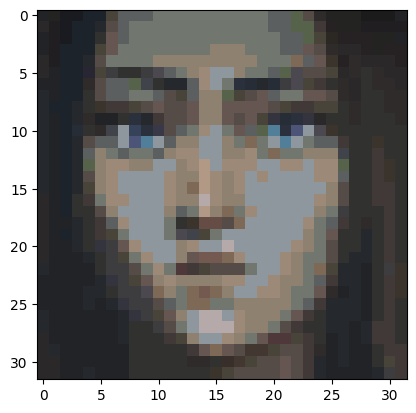

In [16]:
reconstructed, reconstructed_i = reconstruct(image, palette)
plt.imshow(reconstructed)

In [17]:
reconstructed_i

array([[ 63,  88,  90, ...,  55,  55,  63],
       [ 82,  25,  90, ...,  25,  25,  25],
       [ 63,  25,  90, ...,  88,  88,  63],
       ...,
       [ 82,  50,  63, ..., 114,   4,   4],
       [ 82,  82,  63, ..., 114,  53,   4],
       [ 82,  82,  63, ...,  50, 122,   4]], dtype=uint8)

In [ ]:
def data_aug(image):
    resized_image = cv2.resize(image, (72, 72))
    
    # Random Crop to (64, 64)
    crop_size = 64
    max_x = resized_image.shape[1] - crop_size
    max_y = resized_image.shape[0] - crop_size
    x = random.randint(0, max_x)
    y = random.randint(0, max_y)
    cropped_image = resized_image[y:y+crop_size, x:x+crop_size]
    
    # Random Horizontal Flip with probability 0.5
    if random.random() < 0.5:
        flipped_image = cv2.flip(cropped_image, 1)
    else:
        flipped_image = cropped_image
    
    return flipped_image

In [18]:
def reconstruct_images(images):
    r_images = np.empty_like(images, dtype='float32')
    ri_images = np.empty(shape=(images.shape[0], images.shape[1], images.shape[2]), dtype='uint8')
    for i in tqdm(range(len(images))):
        r, ri = reconstruct(images[i], palette)
        r_images[i] = r
        ri_images[i] = ri
    return r_images, ri_images

In [19]:
r_images, ri_images = reconstruct_images(images)

100%|██████████████████████████████████████████████████████████████████████████████| 3411/3411 [07:43<00:00,  7.35it/s]


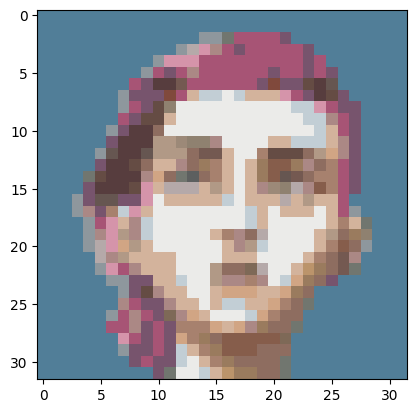

In [20]:
plt.imshow(r_images[102])

In [21]:
r_images.shape

(3411, 32, 32, 3)

In [22]:
r_images.dtype

dtype('float32')

In [23]:
ri_images.shape

(3411, 32, 32)

In [24]:
ri_images.dtype

dtype('uint8')

In [25]:
def get_training_example():
    idx = random.randint(0, len(r_images)-1)
    r = r_images[idx].copy()
    r_i = ri_images[idx]
    n_pixels = r_images.shape[1] * r_images.shape[2]
    n_pixels_remove = random.randint(1, n_pixels - 1)
    p_idx = np.linspace(0, n_pixels-1, n_pixels).astype('int32')
    random.shuffle(p_idx)
    p_idx = p_idx[:n_pixels_remove]
    for i in p_idx:
        x = i % r_images.shape[1]
        y = i // r_images.shape[1]
        r[y][x] = 0
    target = random.choice(p_idx)
    x = target % r_images.shape[1]
    y = target // r_images.shape[1]
    label = np.zeros(shape=(r_images.shape[1], r_images.shape[2], 1), dtype='float32')
    label[y][x] = 1.0
    target = r_i[y][x]
    return r, label, target

In [26]:
r, label, target = get_training_example()

In [27]:
label.shape

(32, 32, 1)

In [28]:
r.dtype

dtype('float32')

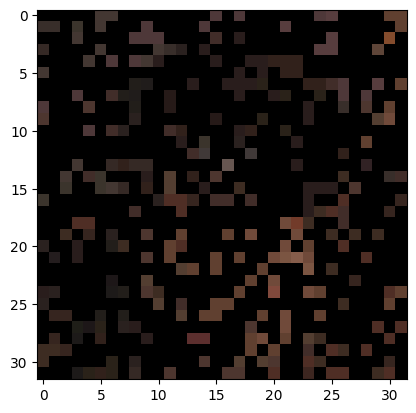

In [29]:
plt.imshow(r)

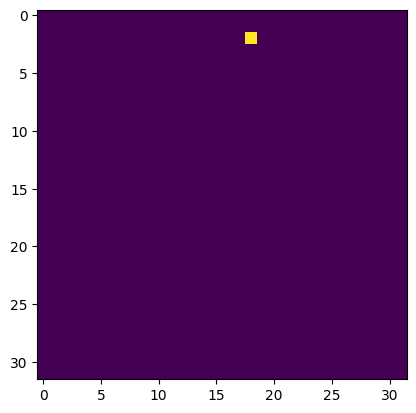

In [30]:
plt.imshow(label)

In [31]:
target

49

In [84]:
def get_batch(batch_size):
    images = np.empty(shape=(batch_size, 32, 32, 4), dtype='float32')
    targets = np.empty(shape=(batch_size), dtype='int64')
    for i in range(batch_size):
        r, l, t = get_training_example()
        images[i] = np.concatenate([r, l], axis=-1)
        targets[i] = t
    return torch.tensor(images), torch.tensor(targets)

In [85]:
images, targets = get_batch(8)

In [86]:
images.shape

torch.Size([8, 32, 32, 4])

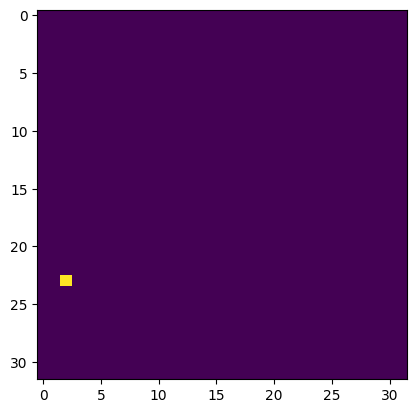

In [87]:
plt.imshow(images[3, :, :, -1])

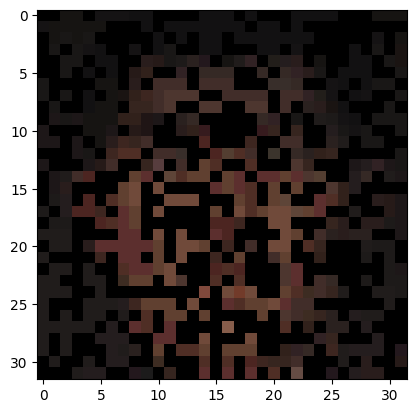

In [88]:
plt.imshow(images[3, :, :, :-1])

In [89]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [90]:
device

'cuda'

In [91]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Conv2d(4, 64, 5, 1, 2),
            nn.MaxPool2d(2),
            nn.ReLU(True),
            # 16x16
            
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.MaxPool2d(2),
            nn.ReLU(True),
            # 8x8

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.MaxPool2d(2),
            nn.ReLU(True),
            # 4x4

            nn.Conv2d(256, 512, 4, 1, 0),
            nn.ReLU(True),
            # 1x1
            
            nn.Flatten(),
            nn.Linear(512, 128)
        )

    def forward(self, x):
        return self.stack(x)

In [92]:
net = Network()
net = net.to(device)
print(net)

Network(
  (stack): Sequential(
    (0): Conv2d(4, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace=True)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU(inplace=True)
    (9): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1))
    (10): ReLU(inplace=True)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=512, out_features=128, bias=True)
  )
)


In [93]:
sum(p.numel() for p in net.parameters())

2538816

In [94]:
images = images.permute(0, 3, 1, 2)

In [95]:
images.shape

torch.Size([8, 4, 32, 32])

In [96]:
images[4].shape

torch.Size([4, 32, 32])

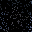

In [97]:
transforms.ToPILImage()(images[0, :3, :, :])

In [98]:
images.dtype

torch.float32

In [99]:
images = images.to(device)

In [100]:
with torch.no_grad():
    y = net(images)

In [101]:
y

tensor([[-5.0207e-02, -3.9525e-02,  2.8594e-03,  ..., -3.7126e-02,
         -2.3312e-02, -1.8689e-02],
        [-5.7131e-02, -3.2216e-02, -3.9742e-03,  ..., -4.1938e-02,
         -2.5672e-02, -1.6851e-02],
        [-4.8325e-02, -4.0578e-02,  4.9260e-05,  ..., -3.7836e-02,
         -2.3957e-02, -2.0651e-02],
        ...,
        [-4.7340e-02, -4.2327e-02,  1.0471e-03,  ..., -3.5236e-02,
         -2.4935e-02, -1.9569e-02],
        [-4.9758e-02, -4.0858e-02,  5.6276e-04,  ..., -3.6482e-02,
         -2.6164e-02, -2.0234e-02],
        [-5.3591e-02, -3.8971e-02, -2.9862e-03,  ..., -3.9790e-02,
         -2.5554e-02, -1.9069e-02]], device='cuda:0')

In [102]:
y.shape

torch.Size([8, 128])

In [103]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

In [104]:
batch_size = 64

def train_step():
    images, targets = get_batch(batch_size)
    images = images.permute(0, 3, 1, 2)
    targets = torch.nn.functional.one_hot(targets, num_classes=128).float()
    images = images.to(device)
    targets = targets.to(device)

    pred = net(images)
    loss = loss_fn(pred, targets)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return loss.item()

In [106]:
def train(iters):
    avg_loss = 0
    for _ in tqdm(range(iters)):
        loss = train_step()
        avg_loss += loss
    avg_loss /= iters
    return avg_loss

In [ ]:
losses = []

In [180]:
for _ in range(1000):
    loss = train(100)
    losses.append(loss)
    print(f'Loss: {loss}')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.51it/s]


Loss: 2.916495020389557


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.28it/s]


Loss: 2.9156258153915404


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.15it/s]


Loss: 2.887474308013916


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.30it/s]


Loss: 2.9035968804359436


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.38it/s]


Loss: 2.8789516949653624


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.25it/s]


Loss: 2.8619408011436462


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.36it/s]


Loss: 2.890484290122986


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.34it/s]


Loss: 2.9008539938926696


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.40it/s]


Loss: 2.8808460664749145


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.25it/s]


Loss: 2.866244568824768


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.98it/s]


Loss: 2.8847969913482667


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.8806781578063965


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.850058512687683


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.8374285364151


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.8474904918670654


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.8539558672904968


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.8484679317474364


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.853497211933136


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.8533816528320313


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.832781708240509


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.8320791292190552


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.8257023739814757


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.91it/s]


Loss: 2.8380972027778624


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.7948344349861145


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.8416402888298036


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.98it/s]


Loss: 2.792635977268219


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.88it/s]


Loss: 2.817377805709839


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.832052013874054


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.780857901573181


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.8158232975006103


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.77693053483963


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.801328659057617


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.797818920612335


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.7719820952415466


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.7703296685218812


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.7659312152862547


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.7610643982887266


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.7838046503067018


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.7904403805732727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.85it/s]


Loss: 2.7480146980285642


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.85it/s]


Loss: 2.7775499844551086


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.750589256286621


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.752011289596558


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.7231980991363525


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.769889907836914


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.754585313796997


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.766152567863464


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.91it/s]


Loss: 2.7480167984962462


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.747659902572632


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.7365326356887816


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.715554645061493


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.95it/s]


Loss: 2.707025887966156


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.7689089155197144


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.7334320402145384


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.90it/s]


Loss: 2.7391248202323912


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.7031253004074096


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.93it/s]


Loss: 2.698127670288086


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.7071404337882994


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.7005973076820373


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.85it/s]


Loss: 2.7065323305130007


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.93it/s]


Loss: 2.7117315578460692


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.00it/s]


Loss: 2.7475848150253297


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.95it/s]


Loss: 2.7309085845947267


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.6937198758125307


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.89it/s]


Loss: 2.7145079517364503


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.85it/s]


Loss: 2.7097999095916747


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.86it/s]


Loss: 2.707706069946289


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.662152419090271


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.678676919937134


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.91it/s]


Loss: 2.6894415283203124


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.83it/s]


Loss: 2.6932536602020263


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.7085305309295653


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.91it/s]


Loss: 2.6655664443969727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.66671315908432


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.7075358986854554


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.695156831741333


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.93it/s]


Loss: 2.704571080207825


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.663748548030853


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.6763778734207153


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.6646731805801394


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.6743497014045716


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.6656221652030947


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.6776933455467224


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.652894015312195


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.6698580479621885


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.6883875632286074


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.85it/s]


Loss: 2.6191367888450623


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.6196666264534


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.615142424106598


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.660083131790161


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.6373388838768004


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.668093349933624


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.6424891638755796


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.6297457075119017


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.632888472080231


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.6569989037513735


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.638412709236145


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.6210049033164977


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.6507694554328918


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.6497698497772215


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.6249678039550783


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.86it/s]


Loss: 2.6482689142227174


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.5980170249938963


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.83it/s]


Loss: 2.621692035198212


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.6095067620277406


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.644482157230377


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.6219800019264223


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.6273717427253724


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.631042068004608


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.95it/s]


Loss: 2.591685492992401


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.619797203540802


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.625417802333832


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.6085369324684144


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.5760269451141355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.98it/s]


Loss: 2.590201995372772


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.84it/s]


Loss: 2.6036410450935366


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.5862550806999205


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.592626736164093


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.02it/s]


Loss: 2.6445750117301943


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.586839294433594


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.5899269080162046


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.92it/s]


Loss: 2.5651218914985656


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.6051090264320376


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.5644375705718994


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.5601752018928527


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.5532732105255125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.589648070335388


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.5662392520904542


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.5651818752288817


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.5438170504570006


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.587881362438202


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.84it/s]


Loss: 2.5996475052833556


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.89it/s]


Loss: 2.591283555030823


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.5707591128349305


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.5731751418113706


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.5850877141952515


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.562178189754486


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.5761458611488344


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.5405489873886107


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.84it/s]


Loss: 2.5543106627464294


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.549081521034241


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.5474599623680114


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.566491894721985


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.5743700194358827


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.5665864777565


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.55145530462265


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.93it/s]


Loss: 2.5602160334587096


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.543990044593811


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.5530259156227113


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.5432458877563477


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.4977019739151003


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.5627482318878174


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.546736524105072


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.538989679813385


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.53210586309433


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.5572913122177123


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.5349232387542724


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.90it/s]


Loss: 2.4996255350112917


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.5163054728507994


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.5197455072402954


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


Loss: 2.500583999156952


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.5201777601242066


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.521795918941498


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.528975372314453


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.5133081531524657


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.517198715209961


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.558307592868805


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.4993646693229676


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.533158910274506


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.5152896356582644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.491215546131134


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.5308851528167726


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.5174392890930175


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.4937400031089783


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.5035465693473817


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.86it/s]


Loss: 2.5258215284347534


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.5117144656181334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.519736874103546


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.507354989051819


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.4879763555526733


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.4832818698883057


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.5002980995178223


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.4807906103134156


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.519375262260437


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.5051872086524964


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.5171395778656005


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.5138878417015076


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.499902772903442


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.4813918256759644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.504886507987976


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.506626946926117


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.464888186454773


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.532414960861206


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.474208929538727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.4867238879203795


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.4905094480514527


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.4942868542671204


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.4888103675842284


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.483271691799164


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.4861601614952087


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.486018589735031


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.4748695349693297


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.4761751317977905


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.494516990184784


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.498377525806427


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.456209073066711


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.25it/s]


Loss: 2.4762299966812136


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.479525980949402


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.471807597875595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.453700783252716


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.467151606082916


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.89it/s]


Loss: 2.504513056278229


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Loss: 2.4752662992477417


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.425652437210083


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.4643064165115356


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.433105969429016


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.4643477725982668


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.83it/s]


Loss: 2.4807828402519227


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.468998308181763


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.4610077381134032


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.4651048612594604


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.43814731836319


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.4381826615333555


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.476064202785492


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.4411714768409727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.4294180822372438


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.4760787796974184


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.4830406856536866


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.426057472229004


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.417937469482422


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.460700334310532


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.37it/s]


Loss: 2.4430405855178834


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.44900235414505


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.4411872959136964


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.4340763235092164


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.4624379515647887


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.4428761982917786


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.4549851989746094


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.4640920853614805


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.4426350831985473


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.4441364908218386


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.4276826858520506


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.422014356851578


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.428968949317932


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.83it/s]


Loss: 2.439386124610901


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.4398366904258726


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.4312150049209595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.416778976917267


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.4206095898151396


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.438103085756302


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.4086110401153564


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.4111989545822143


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.4610973310470583


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.396354945898056


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.412106646299362


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.439211361408234


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.4099641609191895


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.39646124124527


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.441964899301529


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.416981809139252


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.4179497289657594


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.4270352029800417


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.4048884177207945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.4175798726081847


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.408854479789734


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.423731195926666


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.4228744983673094


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.4166816210746767


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.4123656296730043


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.451423785686493


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.32it/s]


Loss: 2.418474061489105


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.405249478816986


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.4360568714141846


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.391957199573517


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.408620231151581


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.3813493502140046


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.4555999517440794


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.368494130373001


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.4062310349941254


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.399598467350006


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.412727632522583


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.404703664779663


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.3719981026649477


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.3536552929878236


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.3924004077911376


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.4015921008586885


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.3971001493930815


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.88it/s]


Loss: 2.3973342871665952


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.400011491775513


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.369991464614868


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.403662724494934


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.4013065695762634


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.3976041865348816


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.01it/s]


Loss: 2.3844392275810242


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.85it/s]


Loss: 2.385531189441681


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.3615154683589936


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.380909025669098


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.403525185585022


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.414142355918884


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.3640342926979065


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.399553680419922


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.3544305646419526


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.374631255865097


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.89it/s]


Loss: 2.374062865972519


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.3910107088088988


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.3935298323631287


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.3864515209198


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.3762954795360565


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.360555784702301


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.4037134575843813


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.88it/s]


Loss: 2.384517341852188


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.36586057305336


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.388018960952759


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.395196840763092


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.363402156829834


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.39033766746521


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.408790264129639


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.367216205596924


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.390672011375427


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.3691070425510405


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.3607284700870514


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.367764024734497


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.3652159607410432


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.379955846071243


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.84it/s]


Loss: 2.366884616613388


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.373797961473465


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.3450428891181945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.3790793895721434


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.3659083437919617


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.3637849950790404


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.3614422810077667


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.379773839712143


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.92it/s]


Loss: 2.3610735726356507


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.330088510513306


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.3498324835300446


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.34099093914032


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.3751005005836485


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.3557543683052065


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.3742173075675965


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.36it/s]


Loss: 2.3915861189365386


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.3742525017261507


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.342147388458252


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.3642071676254273


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.349137099981308


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.3682151687145234


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.3566812300682067


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.335149945020676


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.345016702413559


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.359429657459259


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.363577798604965


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.3541565132141113


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.3764141428470613


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.340775010585785


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.3438975727558136


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.369935172796249


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.344134278297424


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.3482446122169494


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.3798347342014314


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.3268169140815735


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.3355337619781493


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.3181054747104644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.340674350261688


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.322894126176834


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.3364600419998167


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.3641009962558748


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.333365271091461


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.330284116268158


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.3345239341259


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.96it/s]


Loss: 2.3470974922180177


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.05it/s]


Loss: 2.339277400970459


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.32it/s]


Loss: 2.365955573320389


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.3029798078536987


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.328165771961212


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.343624761104584


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.3261592173576355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.325093615055084


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.3124187707901003


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.3330302810668946


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.3166596841812135


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.3341712272167205


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.315317978858948


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.312891857624054


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.341754812002182


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.84it/s]


Loss: 2.3335838925838472


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.338756775856018


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.2955927324295042


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.3266690361499784


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.282608598470688


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.326058770418167


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.316707694530487


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.3322049832344054


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.313563247919083


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.297923984527588


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.309836531877518


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.322959327697754


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.3096059346199036


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.3123219203948975


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.3523875415325164


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.310441188812256


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.299882489442825


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.335920431613922


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.2952144169807434


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.3002028787136077


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.304080320596695


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.88it/s]


Loss: 2.302428079843521


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.339698874950409


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.302181590795517


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.343968703746796


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.3001404213905334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.3082523918151856


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.2956175124645233


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.2977462112903595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.3211444330215456


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.307177491188049


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.3344128489494325


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.3027028679847716


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.297897551059723


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.3123436963558195


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.3265545201301574


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.2844225919246672


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.294912394285202


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.3105420589447023


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.322494487762451


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.323518843650818


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.271948481798172


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.307205035686493


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.302517691850662


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.322971775531769


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.3026328647136687


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.3329406905174257


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.2968748140335085


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.3182086300849916


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.3231935608386993


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.305917196273804


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.3106369149684904


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.3033887267112734


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.2964243018627166


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.2974178433418273


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.35it/s]


Loss: 2.2813633465766907


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.3052908301353456


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.304588471651077


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.271618114709854


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.257542726993561


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.285509178638458


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.2953798258304596


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.290711032152176


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.281291244029999


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.2927185356616975


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.299777463674545


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.2848682034015657


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.2521188843250273


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.2855068075656892


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.3044786465168


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.3075938987731934


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.3129458832740784


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.3021901130676268


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.35it/s]


Loss: 2.273156282901764


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.2877423119544984


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.265466784238815


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.2563140881061554


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.2614691054821012


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.2631429696083067


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.30it/s]


Loss: 2.283655910491943


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.265351414680481


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.2640531730651854


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.2802781105041503


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.2676094007492065


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.317516074180603


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.2312095654010773


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.272010259628296


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.270639241933823


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.2642391300201417


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2931086218357084


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.253863133192062


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.2641338884830473


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.2899296426773073


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.275717899799347


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.2603871810436247


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.2515774607658385


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.83it/s]


Loss: 2.259019525051117


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


Loss: 2.27908762216568


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.27307017326355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.2755154144763945


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.279117525815964


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.2875141847133635


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


Loss: 2.264466780424118


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.249966586828232


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.2666719245910643


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.87it/s]


Loss: 2.2675704562664034


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.2831506443023684


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.2676938152313233


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.273396406173706


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.2798235321044924


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.2586730897426603


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.256936445236206


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.2655904865264893


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.251656963825226


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.88it/s]


Loss: 2.283416885137558


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.2932510662078855


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.243738043308258


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.2981776082515717


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.2455352783203124


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.265577310323715


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.281028599739075


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.2393018686771393


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.21it/s]


Loss: 2.270128000974655


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.2285972309112547


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.236863993406296


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.2447162306308748


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.26it/s]


Loss: 2.2374374222755433


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.2335939693450926


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.248082492351532


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.270393235683441


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.2614368486404417


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.2497088861465455


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.2499130189418795


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.39it/s]


Loss: 2.241380611658096


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.2911091256141662


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.2247454571723937


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.241185266971588


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.2563967049121856


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.2724682831764222


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.254465194940567


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.2767724239826204


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.90it/s]


Loss: 2.2452721929550172


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.2191630685329438


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.277343887090683


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.85it/s]


Loss: 2.2344926607608797


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.2463333582878113


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.2418237781524657


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.2513263607025147


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.25890190243721


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.2162375795841216


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.2490214252471925


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2444161653518675


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.2477363252639773


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.2476166391372683


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.2618791961669924


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.248079036474228


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.2343702626228334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.2343479084968565


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.225766043663025


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.237472513914108


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2245937252044676


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.23703649520874


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.217101320028305


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.2043669950962066


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.242407969236374


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.2490755784511567


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.2617630636692048


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.2673595559597017


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.24179523229599


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.2640461814403534


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.250616046190262


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.2654119288921355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.2602195465564727


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.2434652364253997


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.220082175731659


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.2165342342853545


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.2377557599544526


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.22580198764801


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.2279595279693605


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.227362896203995


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.2476670074462892


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.212736233472824


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2384089648723604


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.215598620176315


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.231103117465973


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.244906396865845


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.2115329337120055


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.238018419742584


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.2404082441329956


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.22it/s]


Loss: 2.233444950580597


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2099933290481566


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.213857412338257


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.2177962946891783


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.39it/s]


Loss: 2.2241242253780364


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.2472080671787262


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.2294009208679197


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2333176612854


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.267257318496704


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.2359030556678774


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.22398647069931


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.225840587615967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.2018325614929197


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.2267186391353606


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.18803906917572


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.2148795747756957


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.2032639038562776


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.241339182853699


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.2003454852104185


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2267206382751463


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.2647158777713776


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.2461590814590453


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.39it/s]


Loss: 2.217449117898941


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.91it/s]


Loss: 2.212227876186371


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.224921977519989


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.213805103302002


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.2207798314094545


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.2316264629364015


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.23393434882164


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.1848628544807434


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.2162140345573427


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.2434350419044495


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.2126982009410856


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.2366136074066163


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.2093926787376406


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.213230527639389


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.1846600556373597


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2211233711242677


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.216852971315384


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.2118315482139588


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.33it/s]


Loss: 2.1888224804401397


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.1905374670028688


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.2429155850410463


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.2166917169094087


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.1867832100391387


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.228838062286377


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.27it/s]


Loss: 2.2387437546253204


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Loss: 2.2033571147918702


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.29it/s]


Loss: 2.226892451047897


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.2013877165317535


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.214466540813446


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.2235445022583007


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.1909640824794767


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.2293438696861267


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.2039328372478484


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.1815018224716187


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.202797898054123


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.37it/s]


Loss: 2.199073852300644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.2096690940856933


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.2083128976821897


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.20920827627182


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.227020317316055


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.210983867645264


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.180981513261795


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Loss: 2.19399698972702


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.2139830780029297


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.17613778591156


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.2054172229766844


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.197127525806427


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.185151765346527


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.1996239364147185


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.2122509610652923


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.1568533205986022


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.1812966585159304


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.2291162538528444


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.2256005680561066


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.211470526456833


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.2015704536437988


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.189825588464737


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.1828937947750093


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


Loss: 2.2177246057987214


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.1774341368675234


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.2149317443370817


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.1992067849636077


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.201267968416214


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.176121882200241


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.2071958804130554


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.194457731246948


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.236555041074753


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.32it/s]


Loss: 2.183068960905075


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.1902817940711974


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.1680017316341402


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.1801716458797453


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.1852592051029207


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.1875257015228273


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.220990159511566


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.1772531950473786


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.185228729248047


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.221167184114456


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.218139661550522


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.2031458234786987


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.195680854320526


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.2127315866947175


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.219071490764618


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.20843976020813


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.1936128199100495


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.196512129306793


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.1715854597091675


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.1997450828552245


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.1733008456230163


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.226868554353714


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.1914128839969633


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.2041853046417237


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.191109011173248


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.2056804978847504


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.201582133769989


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.1848457300662996


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.182879456281662


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Loss: 2.219722226858139


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.2090959692001344


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.163762171268463


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.1862449741363523


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.1819384038448333


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.157533552646637


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.2000971353054046


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.20330037355423


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.13it/s]


Loss: 2.210588847398758


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.20168842792511


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.1848989272117616


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.214860233068466


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.1830095529556273


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.168085483312607


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.1971267437934876


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.1755343103408813


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.208115129470825


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.1881778407096864


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.1507370507717134


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.184194210767746


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.170847728252411


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.28it/s]


Loss: 2.2021174108982087


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.37it/s]


Loss: 2.1732130074501037


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.1644887042045595


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.154992617368698


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.161330600976944


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.1850741612911224


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.1777454137802126


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.1664914762973786


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.1976200699806214


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.142706673145294


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.156492691040039


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.36it/s]


Loss: 2.1827370715141297


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.19688175201416


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.180324372053146


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.15696573972702


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.190718622207642


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.1794485676288606


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


Loss: 2.201150381565094


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.182117075920105


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.20316819190979


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.1794029700756075


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.214640772342682


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.1456533789634706


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.168629666566849


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.166928331851959


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.1617973017692567


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.2091523873806


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.1822293972969056


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.30it/s]


Loss: 2.1832833313941955


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.1534899318218232


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.198482747077942


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.1784873032569885


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.174776977300644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.2004759311676025


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.1832086181640626


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.1597495853900908


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.1663988411426542


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.80it/s]


Loss: 2.148391330242157


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.1694009590148924


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.188948692083359


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.24it/s]


Loss: 2.1476599657535553


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.169541368484497


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.1799401593208314


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.1953394985198975


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.171005229949951


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.183517351150513


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.168446251153946


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.1546739530563355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.1740172898769377


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.161815230846405


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.1708731269836425


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.78it/s]


Loss: 2.1883608627319338


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.167099161148071


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.181361833810806


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.121192618608475


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.169696271419525


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.1615407621860503


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.1710694098472594


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.1893475139141083


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.150860928297043


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.156167656183243


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.1389861726760864


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.151713262796402


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.1732196962833403


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.77it/s]


Loss: 2.18211083650589


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.184847152233124


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.1526295483112334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.1868645370006563


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.136978563070297


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.137692803144455


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.1600984704494475


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.81it/s]


Loss: 2.151636253595352


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.1649743735790254


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.157084447145462


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.143632069826126


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.182931948900223


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.145232185125351


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.140965336561203


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.75it/s]


Loss: 2.1340397822856905


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


Loss: 2.163821873664856


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.36it/s]


Loss: 2.184349693059921


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.1447569489479066


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.1417555344104766


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.1275875413417817


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.15505974650383


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.1610198497772215


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.122900208234787


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.146429806947708


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.29it/s]


Loss: 2.1688322722911835


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.139676558971405


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.1716303646564485


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.120309238433838


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.17it/s]


Loss: 2.1504232573509214


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.1260172760486604


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.32it/s]


Loss: 2.1221488988399506


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.1216529047489168


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.1341578936576844


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.139726185798645


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.1501730465888977


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.1770859003067016


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.1574184572696686


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.1505725824832918


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.1217692530155183


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.162143292427063


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.36it/s]


Loss: 2.1252158987522125


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.185106235742569


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.30it/s]


Loss: 2.1473336493968964


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.114350701570511


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.1403892850875854


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.148286887407303


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.1512962651252745


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.160673282146454


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.1668849754333497


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.1397197329998017


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.1567876291275025


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.1578569281101228


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.1463710224628447


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.1542274725437163


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.1676442110538483


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.21it/s]


Loss: 2.149107106924057


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.1610678243637085


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.1419781374931337


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.1710081923007967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.31it/s]


Loss: 2.168911210298538


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.1730960714817047


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.1683894979953764


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.121203602552414


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.37it/s]


Loss: 2.11523983001709


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.25it/s]


Loss: 2.1356905055046083


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.31it/s]


Loss: 2.1267805707454683


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.13998854637146


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.1486887884140016


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.143064857721329


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.154180337190628


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.22it/s]


Loss: 2.147752522230148


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.133491895198822


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.188510149717331


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.155899181365967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.12285183429718


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.30it/s]


Loss: 2.1741952288150785


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.1457312524318697


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.1520833349227906


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.1339938652515413


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.138995351791382


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.37it/s]


Loss: 2.1463489258289337


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.12882164478302


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.163991893529892


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.1359820210933687


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.1268277776241304


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.1530055141448976


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.111974093914032


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.1276974511146545


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.099672290086746


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.1207581663131716


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.110857059955597


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.22it/s]


Loss: 2.110817402601242


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.121353040933609


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.1405508625507355


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.39it/s]


Loss: 2.115639522075653


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.0932037246227266


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.1160121858119965


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.1551515007019044


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.1178968858718874


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.148449068069458


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.1485735642910004


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.139184114933014


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.127051546573639


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.109563775062561


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.1689426064491273


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.21it/s]


Loss: 2.16229016661644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.1384920835494996


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.35it/s]


Loss: 2.159889956712723


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Loss: 2.1143252098560334


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.28it/s]


Loss: 2.130978218317032


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.1357097804546354


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Loss: 2.1221868896484377


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Loss: 2.1505755400657653


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.89it/s]


Loss: 2.1436386144161226


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.82it/s]


Loss: 2.128708894252777


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.1432676792144774


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.1086611008644103


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.112227716445923


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.155002535581589


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.1765597188472747


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.089641854763031


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.37it/s]


Loss: 2.1363754963874815


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.1589794063568117


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.1146697282791136


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.1115863239765167


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.1263631975650785


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


Loss: 2.1772737765312193


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.29it/s]


Loss: 2.1314592897891997


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.1345671701431272


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.147590799331665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.1222677505016327


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.134027338027954


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.72it/s]


Loss: 2.093126970529556


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.120239751338959


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.133603414297104


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.1125191819667815


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.119120728969574


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.0849589598178864


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.1264631962776184


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.1038404297828674


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.0849235570430755


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.0996019756793975


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.61it/s]


Loss: 2.0986217248439787


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.114583796262741


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.1110543215274813


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.126166162490845


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.52it/s]


Loss: 2.096460973024368


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.132412348985672


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.1283034348487853


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.132107728719711


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.42it/s]


Loss: 2.130950224399567


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.139250497817993


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.083764215707779


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.64it/s]


Loss: 2.1582227289676665


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.128942687511444


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.31it/s]


Loss: 2.081765282154083


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.0993458235263827


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


Loss: 2.1279544377326967


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]


Loss: 2.146141904592514


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.65it/s]


Loss: 2.102368609905243


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.32it/s]


Loss: 2.1257008588314057


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.1110576295852663


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.159836605787277


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.71it/s]


Loss: 2.126340672969818


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.133034051656723


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.35it/s]


Loss: 2.1357805812358857


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.0979719614982604


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.39it/s]


Loss: 2.125683151483536


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.1271592712402345


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.1011572754383088


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.123565660715103


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.1016783964633943


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.1325653088092804


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.0833067226409914


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.1370678615570067


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.1048189401626587


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.1435267055034637


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.1082660257816315


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.30it/s]


Loss: 2.120889528989792


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.152872095108032


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.33it/s]


Loss: 2.089682765007019


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]


Loss: 2.1501947057247164


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.100870622396469


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.099465442895889


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


Loss: 2.1240760695934298


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.55it/s]


Loss: 2.101542990207672


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.36it/s]


Loss: 2.1397485482692717


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.38it/s]


Loss: 2.1405466532707216


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.1010990500450135


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.37it/s]


Loss: 2.1132637631893156


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.60it/s]


Loss: 2.111409958600998


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.67it/s]


Loss: 2.1234478664398195


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.53it/s]


Loss: 2.1244628727436066


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.25it/s]


Loss: 2.0877434003353117


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.074305684566498


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.39it/s]


Loss: 2.137603464126587


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.70it/s]


Loss: 2.129067463874817


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.43it/s]


Loss: 2.153163410425186


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.095337426662445


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.1028263866901398


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


Loss: 2.0997266578674316


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.54it/s]


Loss: 2.101128704547882


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.29it/s]


Loss: 2.093057279586792


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.1037868285179138


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.47it/s]


Loss: 2.13072958111763


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.1528187561035157


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.0699864649772644


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.50it/s]


Loss: 2.1199521243572237


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.73it/s]


Loss: 2.0875446963310242


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.66it/s]


Loss: 2.132591345310211


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.62it/s]


Loss: 2.1079694056510925


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.74it/s]


Loss: 2.1002527475357056


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.59it/s]


Loss: 2.1278685581684114


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.51it/s]


Loss: 2.1152109479904175


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.49it/s]


Loss: 2.104489939212799


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.46it/s]


Loss: 2.1151827704906463


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.1289419209957123


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.76it/s]


Loss: 2.0886323750019073


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.41it/s]


Loss: 2.1303642892837527


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.44it/s]


Loss: 2.090339933633804


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.14it/s]


Loss: 2.1094218528270723


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.34it/s]


Loss: 2.099119967222214


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.57it/s]


Loss: 2.1063475465774535


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.45it/s]


Loss: 2.081733272075653


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.58it/s]

Loss: 2.105670665502548


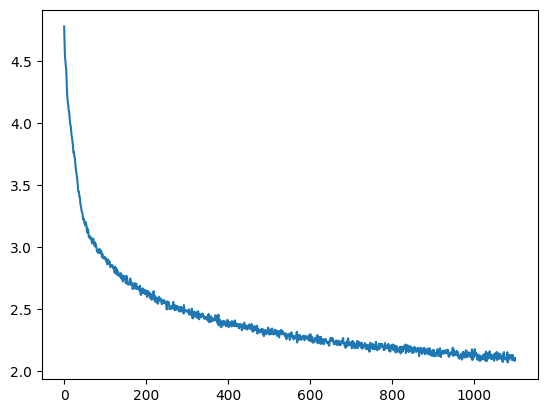

In [181]:
plt.plot(losses)

In [209]:
def gen_image(w, h):
    image = torch.zeros(size=(1, 3, w, h), dtype=torch.float32, device=device)
    n_pixels = w * h
    p_idx = np.linspace(0, n_pixels - 1, n_pixels, dtype='int32')
    random.shuffle(p_idx)
    for i in p_idx:
        x = i % 32
        y = i // 32
        label =  torch.zeros(size=(1, 1, w, h), dtype=torch.float32, device=device)
        label[0, 0, y, x] = 1.0
        with torch.no_grad():
            pred = net(torch.cat([image, label], axis=1))
            pred = torch.softmax(pred, dim=1)
        weights = np.array(pred[0].cpu())
        color = random.choices(palette, weights=weights, k=1)[0]
        image[0, :, y, x] = torch.tensor(color, device=device)
    return image

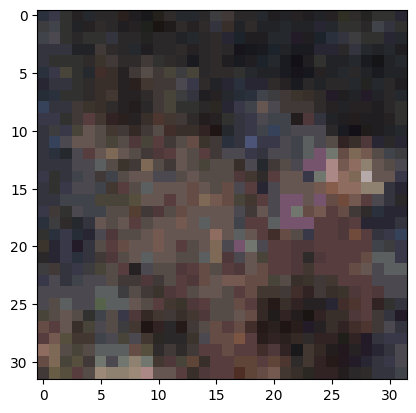

In [225]:
img = gen_image(32, 32)
image = transforms.ToPILImage()(img[0].cpu())
image = np.array(image)
plt.imshow(image)